# 第8章: 機械学習

## 70. データの入手・整形

In [1]:
%system wget http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz

['--2017-05-10 14:11:29--  http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz',
 'Resolving www.cs.cornell.edu... 132.236.207.20',
 'Connecting to www.cs.cornell.edu|132.236.207.20|:80... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 487770 (476K) [application/x-gzip]',
 'Saving to: ‘rt-polaritydata.tar.gz’',
 '',
 '     0K .......... .......... .......... .......... .......... 10% 32.4K 13s',
 '    50K .......... .......... .......... .......... .......... 20% 28.3K 12s',
 '   100K .......... .......... .......... .......... .......... 31% 20.7K 12s',
 '   150K .......... .......... .......... .......... .......... 41% 31.5K 10s',
 '   200K .......... .......... .......... .......... .......... 52% 23.2K 9s',
 '   250K .......... .......... .......... .......... .......... 62% 25.1K 7s',
 '   300K .......... .......... .......... .......... .......... 73% 10.3K 6s',
 '   350K .......... .......... .......... .......... ..........

In [1]:
%system tar -xzf rt-polaritydata.tar.gz

[]

In [2]:
%system perl -i -pe 's/^/+1 /' rt-polaritydata/rt-polarity.pos

[]

In [3]:
%system perl -i -pe 's/^/-1 /' rt-polaritydata/rt-polarity.neg

[]

In [4]:
%system nkf -w --overwrite rt-polaritydata/rt-polarity.pos

[]

In [5]:
%system nkf -w --overwrite rt-polaritydata/rt-polarity.neg

[]

In [6]:
import random


with open('rt-polaritydata/rt-polarity.pos') as fd1,\
     open('rt-polaritydata/rt-polarity.neg') as fd2:
    lines = [line for line in fd1]
    lines += [line for line in fd2]
random.shuffle(lines)

with open('sentiment.txt', 'w') as fd:
    fd.write(''.join(lines))

In [7]:
%system grep -c '^\-1 ' sentiment.txt

['5331']

In [8]:
%system grep -c '^+1 ' sentiment.txt

['5330']

## 71. ストップワード

In [9]:
STOP_WORDS = ('the', 'and', 'or')


def is_stop_word(word):
    return word in STOP_WORDS


def test_is_stop_word():
    assert is_stop_word('the') is True
    assert is_stop_word('happy') is False


test_is_stop_word()

## 72. 素性抽出

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from stemming.porter2 import stem


def preprocess(word):
    return stem(word)

def tokenize(sentence):
    sentence = sentence[3:-1]
    return [stem(w) for w in sentence.split(' ')]

vectorizer = TfidfVectorizer(decode_error='ignore', analyzer='word', preprocessor=preprocess,
                 tokenizer=tokenize, stop_words='english')

In [11]:
x = vectorizer.fit_transform([line for line in open('sentiment.txt')])

In [12]:
import numpy as np

y = [int(line[:2]) for line in open('sentiment.txt')]
y = np.array(y)

## 73. 学習

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 74. 予測

In [14]:
lr.predict_proba(x[0])

array([[ 0.22541091,  0.77458909]])

## 75. 素性の重み

In [15]:
print('TOP WORDS')
print([vectorizer.get_feature_names()[idx] for idx in lr.coef_[0].argsort()[-10:][::-1]])
print('LEAST WORDS')
print([vectorizer.get_feature_names()[idx] for idx in lr.coef_[0].argsort()[:10]])

TOP WORDS
['beauti', 'refresh', 'perform', 'enjoy', 'solid', 'best', 'heart', 'engross', 'entertain', 'cinema']
LEAST WORDS
['bad', 'bore', 'dull', 'lack', 'worst', 'fail', 'flat', 'wast', 'onli', "doesn't"]


## 76. ラベル付け

In [16]:
for (_x, _y) in zip(x, y):
    print('%s, %s, %s' % (_y, lr.predict(_x)[0], lr.predict_proba(_x)))

1, 1, [[ 0.22541091  0.77458909]]
-1, -1, [[ 0.55157817  0.44842183]]
-1, -1, [[ 0.67351414  0.32648586]]
-1, -1, [[ 0.52486616  0.47513384]]
-1, -1, [[ 0.81744466  0.18255534]]
1, 1, [[ 0.37955662  0.62044338]]
-1, -1, [[ 0.91713334  0.08286666]]
-1, -1, [[ 0.51157939  0.48842061]]
1, 1, [[ 0.46695901  0.53304099]]
-1, -1, [[ 0.88705946  0.11294054]]
1, 1, [[ 0.30921074  0.69078926]]
-1, -1, [[ 0.67309345  0.32690655]]
1, 1, [[ 0.28599167  0.71400833]]
1, 1, [[ 0.29497896  0.70502104]]
1, 1, [[ 0.35477471  0.64522529]]
1, -1, [[ 0.5153696  0.4846304]]
1, 1, [[ 0.2221074  0.7778926]]
-1, -1, [[ 0.54719003  0.45280997]]
-1, -1, [[ 0.85614277  0.14385723]]
-1, -1, [[ 0.61342332  0.38657668]]
1, 1, [[ 0.2049143  0.7950857]]
-1, 1, [[ 0.49767715  0.50232285]]
-1, 1, [[ 0.4984432  0.5015568]]
1, 1, [[ 0.40402  0.59598]]
1, 1, [[ 0.11646773  0.88353227]]
1, 1, [[ 0.22004432  0.77995568]]
-1, -1, [[ 0.79182792  0.20817208]]
-1, -1, [[ 0.84571659  0.15428341]]
1, 1, [[ 0.28310486  0.71689514]]

## 77. 正解率の計測

In [17]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)

predicted = lr.predict(x)

print('accuracy_score:')
print(accuracy_score(y, predicted))
print('precision_score:')
print(precision_score(y, predicted))
print('recall_score:')
print(recall_score(y, predicted))
print('f1_score:')
print(f1_score(y, predicted))

accuracy_score:
0.881624613076
precision_score:
0.884063444109
recall_score:
0.878424015009
f1_score:
0.881234707322


## 78. 5分割交差検定

In [18]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for (train_index, test_index) in kf.split(x):
    lr = LogisticRegression()
    lr.fit(x[train_index], y[train_index])
    predicted = lr.predict(x[test_index])
    print('accuracy_score:')
    print(accuracy_score(y[test_index], predicted))
    print('precision_score:')
    print(precision_score(y[test_index], predicted))
    print('recall_score:')
    print(recall_score(y[test_index], predicted))
    print('f1_score:')
    print(f1_score(y[test_index], predicted))

accuracy_score:
0.772620721988
precision_score:
0.759036144578
recall_score:
0.784482758621
f1_score:
0.771549693829
accuracy_score:
0.75469043152
precision_score:
0.762535477767
recall_score:
0.747680890538
f1_score:
0.755035128806
accuracy_score:
0.772514071295
precision_score:
0.776007497657
recall_score:
0.77094972067
f1_score:
0.773470340962
accuracy_score:
0.767354596623
precision_score:
0.791788856305
recall_score:
0.741079597438
f1_score:
0.765595463138
accuracy_score:
0.74765478424
precision_score:
0.736594543744
recall_score:
0.752161383285
f1_score:
0.744296577947


/work/venv/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


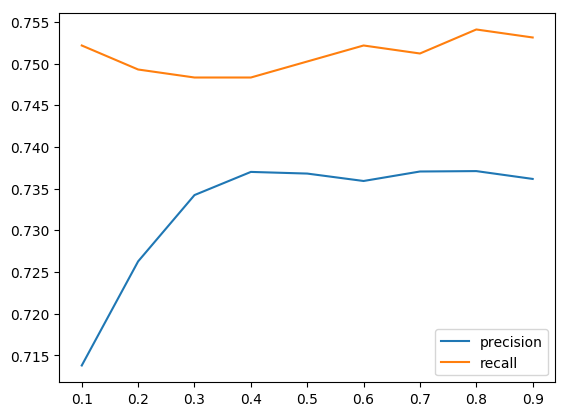

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

precisions = []
recalls = []

for i in np.arange(0.1, 1, 0.1):
    lr = LogisticRegression(C=i)
    lr.fit(x[train_index], y[train_index])
    predicted = lr.predict(x[test_index])
    precisions.append(precision_score(y[test_index], predicted))
    recalls.append(recall_score(y[test_index], predicted))

fig = plt.figure()
plt.plot(np.arange(0.1, 1, 0.1), precisions, label='precision')
plt.plot(np.arange(0.1, 1, 0.1), recalls, label='recall')
plt.legend()
plt.show()